# Visualize Active Learning

In this example, we demonstrate the GP fitting process on a 1D function and visualize the active learning function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

import alabi
from alabi.core import SurrogateModel
import alabi.utility as ut

# Remove matplotlib background
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'none'
plt.rcParams['savefig.facecolor'] = 'none'

In [2]:
def test1d_fn(theta):
    theta = np.asarray(theta)
    return -np.sin(3*theta) - theta**2 + 0.7*theta

# domain of the function
bounds = [(-2,3)]

def plot_current_gp(sm, save_frame=False, frame_dir="frames", iteration=0):
    # Clear any existing plots to prevent memory buildup
    plt.clf()  # Clear current figure
    plt.cla()  # Clear current axes
    
    xgrid = np.arange(sm.bounds[0][0], sm.bounds[0][1]+.1, .01)
    mu, var = sm.gp.predict(sm._y, xgrid, return_cov=False, return_var=True)
    title = f"iterations = {len(sm._theta) - sm.ninit_train}"

    fig, ax = plt.subplots(1, 1, figsize=[10,4])
    plt.subplots_adjust(hspace=0)
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.plot(xgrid, test1d_fn(xgrid), color="k", linestyle="--", label="true function", linewidth=2)
    ax.plot(xgrid, mu, color="r", linewidth=2, label="GP fit")
    ax.fill_between(xgrid, mu - np.sqrt(var), mu + np.sqrt(var), color="lightsalmon")
    ax.scatter(sm._theta, sm._y, color="r", label="training points", s=80, zorder=5)

    ax.set_xlim(sm.bounds[0][0], sm.bounds[0][1])
    ax.set_ylim(-8, 1)
    # ax.set_ylabel("GP surrogate model", fontsize=18)
    # ax.set_xlabel("x", fontsize=18)
    # ax.legend(loc="lower center", fontsize=14, frameon=False)
    # ax.set_title(title, fontsize=20)
    ax.minorticks_on()

    if save_frame:
        # Create frame directory if it doesn't exist
        os.makedirs(frame_dir, exist_ok=True)
        plt.savefig(f"{frame_dir}/frame_{iteration:03d}.png", dpi=400, bbox_inches='tight', transparent=True)
    
    # Properly close and clear the figure to free memory
    plt.close(fig)  # Close the specific figure
    plt.close('all')  # Close all figures as backup
    
    return fig

In [5]:
sm = SurrogateModel(lnlike_fn=test1d_fn, 
                    bounds=bounds, 
                    savedir=f"results/test1d",
                    theta_scaler=alabi.no_scaler,
                    y_scaler=alabi.no_scaler,
                    cache=False,
                    random_state=7)

sm.init_samples(ntrain=3, sampler="sobol")
sm.init_gp(kernel="ExpSquaredKernel", fit_amp=True, fit_mean=True, white_noise=-12, gp_scale_rng=[-1,1])

Computed 3 function evaluations: 4.0s 

Initialized GP with squared exponential kernel.
Successfully initialized GP on attempt 1
Optimized 4 hyperparameters: (0.012s)


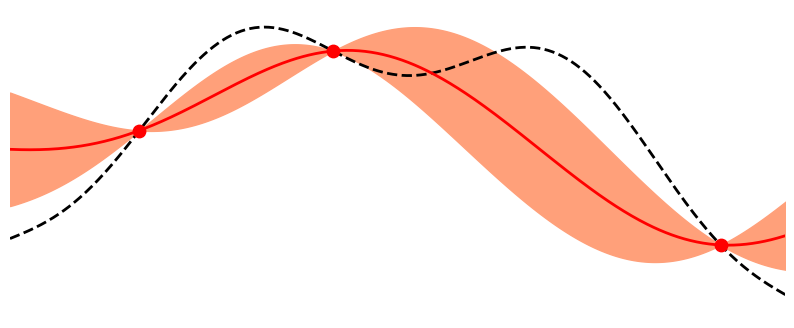

In [6]:
plot_current_gp(sm)

Define a plot function for inspecting the current GP fit so that we can compare the fit before and after active learning training.

In [9]:
def create_animation_gif(sm, niter=20, algorithm="bape", frame_dir="frames", gif_name="active_learning_animation.gif"):
    """
    Create an animated GIF showing the evolution of GP fit during active learning.
    """
    # Clear any existing frames
    if os.path.exists(frame_dir):
        for f in os.listdir(frame_dir):
            if f.endswith('.png'):
                os.remove(os.path.join(frame_dir, f))
    
    # Create initial frame
    fig = plot_current_gp(sm, save_frame=True, frame_dir=frame_dir, iteration=0)
    plt.close(fig)  # Close the specific figure
    plt.close('all')  # Close all figures as backup
    
    # Perform active learning and save frames
    for i in range(niter):
        sm.active_train(niter=1, algorithm=algorithm)
        
        # Create frame
        fig = plot_current_gp(sm, save_frame=True, frame_dir=frame_dir, iteration=i+1)
        plt.close(fig)  # Close the specific figure
        plt.close('all')  # Close all figures as backup
        
        print(f"Iteration {i+1}/{niter} complete")
    
    # # Create GIF from frames
    os.system(f"convert -delay 40 -loop 0 -dispose previous -units PixelsPerInch {frame_dir}/*.png -density 300 {gif_name}")
    print(f"Animation saved as {gif_name}")

In [10]:
algorithm = "jones"
create_animation_gif(sm, niter=20, algorithm=algorithm, 
                     frame_dir="results/frames", 
                     gif_name=f"active_learning_animation_{algorithm}.gif")

Running 1 active learning iterations using jones...


100%|██████████| 1/1 [00:00<00:00, 13.48it/s]


Iteration 1/20 complete
Running 1 active learning iterations using jones...


100%|██████████| 1/1 [00:00<00:00, 10.11it/s]


Iteration 2/20 complete
Running 1 active learning iterations using jones...


100%|██████████| 1/1 [00:00<00:00, 10.60it/s]


Iteration 3/20 complete
Running 1 active learning iterations using jones...


100%|██████████| 1/1 [00:00<00:00, 10.81it/s]


Iteration 4/20 complete
Running 1 active learning iterations using jones...


100%|██████████| 1/1 [00:00<00:00, 11.66it/s]


Iteration 5/20 complete
Running 1 active learning iterations using jones...


100%|██████████| 1/1 [00:00<00:00,  9.54it/s]


Iteration 6/20 complete
Running 1 active learning iterations using jones...


100%|██████████| 1/1 [00:00<00:00, 10.12it/s]


Iteration 7/20 complete
Running 1 active learning iterations using jones...


100%|██████████| 1/1 [00:00<00:00, 14.83it/s]


Iteration 8/20 complete
Running 1 active learning iterations using jones...


100%|██████████| 1/1 [00:00<00:00, 10.76it/s]


Iteration 9/20 complete
Running 1 active learning iterations using jones...


100%|██████████| 1/1 [00:00<00:00, 10.97it/s]


Iteration 10/20 complete
Running 1 active learning iterations using jones...


100%|██████████| 1/1 [00:00<00:00, 13.19it/s]


Iteration 11/20 complete
Running 1 active learning iterations using jones...


100%|██████████| 1/1 [00:00<00:00, 14.04it/s]


Iteration 12/20 complete
Running 1 active learning iterations using jones...


100%|██████████| 1/1 [00:00<00:00, 11.21it/s]


Iteration 13/20 complete
Running 1 active learning iterations using jones...


100%|██████████| 1/1 [00:00<00:00, 12.32it/s]


Iteration 14/20 complete
Running 1 active learning iterations using jones...


100%|██████████| 1/1 [00:00<00:00,  9.95it/s]


Iteration 15/20 complete
Running 1 active learning iterations using jones...


100%|██████████| 1/1 [00:00<00:00,  9.44it/s]


Iteration 16/20 complete
Running 1 active learning iterations using jones...


100%|██████████| 1/1 [00:00<00:00, 16.49it/s]


Iteration 17/20 complete
Running 1 active learning iterations using jones...


100%|██████████| 1/1 [00:00<00:00, 12.72it/s]


Iteration 18/20 complete
Running 1 active learning iterations using jones...


100%|██████████| 1/1 [00:00<00:00, 10.57it/s]


Iteration 19/20 complete
Running 1 active learning iterations using jones...


100%|██████████| 1/1 [00:00<00:00,  9.60it/s]

Optimized 4 hyperparameters: (0.014s)


Iteration 20/20 complete
Animation saved as active_learning_animation_jones.gif


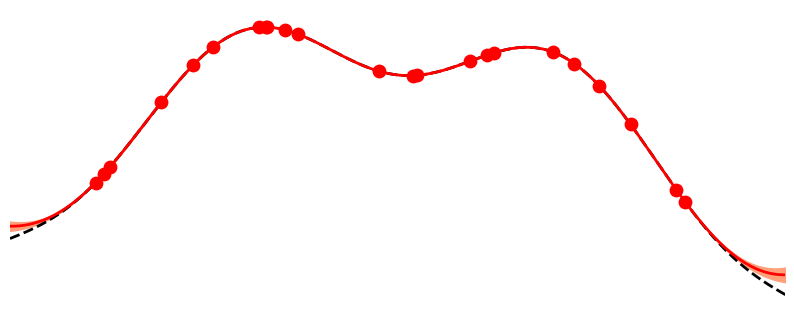

In [11]:
plot_current_gp(sm)